In [6]:
from MatModels import *
import pandas as pd

# 1.Parque zoologico

Suponga que se aparta suficiente terreno para la preservación de los elefantes y que hay entonces suficiente espacio para muchos más territorios que elefantes. En consecuencia, no habrá peligro de una sobrepoblación. Sin embargo, si la pobláción es muy pequeña, los adultos fértiles tendrán dificultad en encontrarse cuando sea el tiempo de apareamiento. Modele la población de elefantes con base en esas hipótesis. (Notar que hay más de un modelo razonable que se ajusta a esas suposiciones. Graficar y conjeturar el modelo

In [78]:
#rN
#N poblacion
# k constante de crecimiento aprox sacada de os datos obtenidos de un dataset
#k = 1 / t_real[1] * numpy.log(p_real[1]/p_real[0])
# P poblacion actual / N tamanio del territorio 
#vemos que con el territrio teoricamente ilimitado que tenemos, al tener una poblacion pequena 
#N distancia entre los elefantitos
# a mas distancia los elefantitos batallan mas en reproducirse y tardan mas en crecer
def get_Pop(t,P,k,N):
  dPdt = k*P*(1 - P/N)
  return dPdt




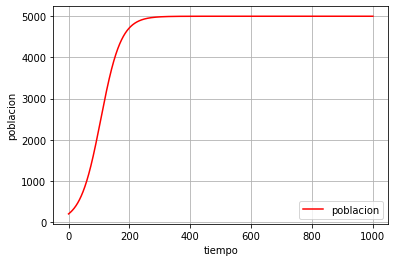

In [79]:
res = get_euler(0, 1000,200,get_Pop,0.01 ,0.03,5000)
plt.plot(res[1], res[0], c='red', label="poblacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("poblacion")
plt.legend()

# 2. Población de pájaros

El taragachi es un pájaro muy conocido en Mizque. Se tienen datos sobre la población de Taragachis: "taragachi.csv". 
* ¿Qué modelo de población usaría usted para modelar esta población?
* Modelar y simular el crecimiento del targachi.

In [94]:

data = np.loadtxt("taragachi.csv", delimiter=",")

#data = pd.read_csv("taragachi.csv")
data




array([[1947.,   34.],
       [1948.,   40.],
       [1949.,   40.],
       [1950.,   40.],
       [1951.,   42.],
       [1952.,   48.],
       [1943.,   48.],
       [1954.,   52.],
       [1955.,   60.],
       [1956.,   64.],
       [1957.,   64.],
       [1958.,   62.],
       [1959.,   64.]])

In [95]:
#capturamos tiempos y poblacion
t_real = data[:, 0] # capturamos todas las filas (:), de la primera columna
p_real = data[:, 1] # capturamos todas las filas (:), de la segunda columna
p0 = t_real[0]
t_real = t_real - p0  # 1790 sera nuestro t=0

k = 1 / t_real[1] * np.log(p_real[1]/p_real[0])
k

0.16251892949777494

In [87]:
# creamos un array tiempo desde 0 hasta 250 dividido en 200 partes
tiempos = np.linspace(0, 200, 200)

# calculamos array de poblacion para cada t del vector creado "tiempos"
poblacion = getPoblacion(p0, k, tiempos)


In [85]:
def getPoblacion(p0, k, t):
  p = p0 * np.exp(k * t)
  return p

Text(0.5, 1.0, 'Simulacion del modelo')

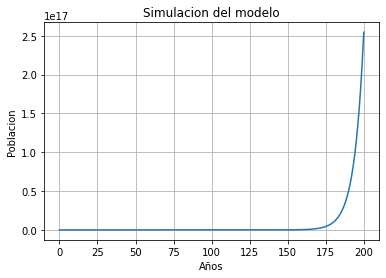

In [89]:
# graficamos la simulación de nuestro modelo para ver su comportamiento en el tiempo
plt.plot(tiempos, poblacion)
plt.grid() # mostrar grilla en la grafica
plt.xlabel("Años") # etiquetar eje x
plt.ylabel("Poblacion") #etiquetar eje y
plt.title("Simulacion del modelo")

Text(0, 0.5, 'Poblacion')

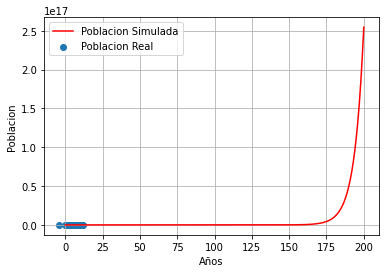

In [93]:
# comparamos datos reales y datos simulados con nuestro modelo
plt.plot(tiempos, poblacion, color='red', label="Poblacion Simulada")
plt.scatter(t_real, p_real, label="Poblacion Real")
plt.grid()
plt.legend()
plt.xlabel("Años")
plt.ylabel("Poblacion")
#LOS PAJAROS SE MUEREN MAS RAPIDO PERO EL MODELO SE AJUSTA BIEN 
# CUANDO LOS PAJAROS SON POCOS Y NO SE MUEREN , EL MODELO SE AJUSTA BIEN 

# 3. Población de peces

Suponga que una especie de pez en un lago específico tiene una población que sigue
el modelo logístico de población con razón $k$ de crecimiento 0.2, capacidad $N$ de soporte
y tiempo $t$ medido en años. Ajuste el modelo para tomar en cuenta cada una de las situaciones siguientes.

* 100 peces son cultivados cada año.
* Un tercio de la población de peces es cultivada anualmente.
* El número de peces cultivados cada año es proporcional a la raíz cuadrada del número de peces en el lago

In [121]:
#N 2000
def get_logisticoPeces(t, P, k,N):
  dPdt = (k*P*(1 - P/N) )*np.sqrt(P+P/3)
  return dPdt

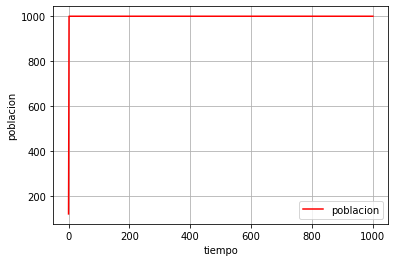

In [122]:
res = get_euler(0,1000,100,get_logisticoPeces,0.1 ,0.2,1000)
plt.plot(res[1], res[0], c='red', label="poblacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("poblacion")
plt.legend()
# los peces crecen muy rapido , que bien por los peces

# 4. Población suceptible

Suponga que una población puede ser modelada precisamente por la ecuación logística. Considere que el parámetro de razón de crecimiento es 0.4 y la capacidad de soporte es 30.

Suponga que en el tiempo $t = 5$ se presenta una enfermedad en la población que mata 25% de la población por año. Modelar y simular el sistema con $P(0) = 30$ y $P(0) = 20$. Interpretar y explicar ambos comportamiento

In [106]:
def get_logistico(t, P, k,N):
  dPdt = k*P*(1 - P/N)
  if t==5:
    muerte = P*0.25
    dPdt = (k*P*(1 - P/N)) - muerte
  return dPdt

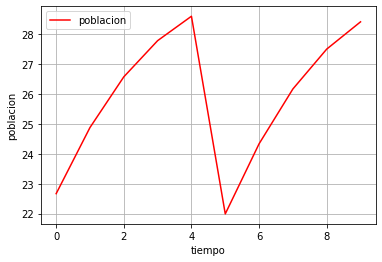

In [111]:
res = get_euler(0,10,20,get_logistico,1 ,0.4,30)
plt.plot(res[1], res[0], c='red', label="poblacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("poblacion")
plt.legend()
# se ve como en el tiempo 5 empiezan las muertes pero luego se recuperan normalmente

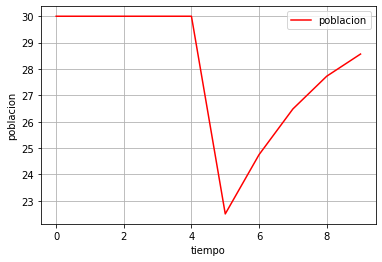

In [112]:
res = get_euler(0,10,30,get_logistico,1 ,0.4,30)
plt.plot(res[1], res[0], c='red', label="poblacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("poblacion")
plt.legend()

#hacion mas constante al principio y luego de las muertes, toma un poco mas en recuperarse la poblcion 
# el 25 % de 30 es mas que el 25% de 20

# 5. Depredador presa con recursos limitados.

Considere el sistema de ecuaciones depredador-presa: conejos zorros. El entorno proporciona un limite de conejos que pueden alimentarse de los vegatales $N=3$, considere el parametro de crecimiento del conejo en 2, decrecimiento del zorro 16. a constante de proporcionalidad de que un conejo se encuentre con un zorro es de 1. Y constante de proporcionalidad de que un zorro caze un conejo es de 4.
    
Modelar y ejecutar la simulacion en 10 años. Iniciar conuna poblacion de $Z=1$, $C=8$ Que predice el modelo? explicar el comportamiento.

In [115]:
def ecosistema(t, ci, a, b, c, d, N):
  dcdt = a * ci[0] - b * ci[0] * ci[1] # ci es un vector
  dzdt = -c * ci[1] + d * ci[0] * ci[1]
  return np.array([dcdt, dzdt])

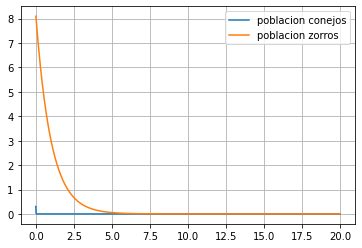

In [116]:
# v = f(t)
ci = np.array([1.0,8.0]) # 100 y 50
Y, t = getRungeKutta(0,20,ci, ecosistema, 0.01 ,2.0, 16.0, 1,4, 3)
 
plt.plot(t,Y[:,0], label = "poblacion conejos")
plt.plot(t,Y[:,1], label = "poblacion zorros")
plt.legend()
plt.grid()

In [117]:
# claramente los zorros extinguieron a los conejos y despues se quedaron sin comida